# **EDA**

# PASOS EDA:
1. **Carga  librerias**
2. **Carga  de datos**
3. **Exploración y análisis inicial**

   3.1.  Mostrar la lista de nombres de columnas del DataFrame cargado

   3.2. Mostrar las primeras filas del DataFrame para visualizar una muestra de los datos

   3.3.Mostrar los tipos de datos de cada columna del DataFrame

   3.4 Mostrar el número total de filas (registros), columnas y nombres del dataframe

   3.5 Separacion y conteo de columnas numericas y categoricas. Exposicion de sus primeras filas.

   3.6  Muestra resumen de contenido, tipo y cantidad de variables de nuestro DATAFRAME

   3.7 analisis de nulos y nulos escondidos

 4. **Visualización de variables y target**

     4.1  Estadísticas descriptivas y sesgos de las variables numéricas

     4.2 Estadísticas descriptivas de las variables categoricas

5. **Influencia de variables con la variable " TARGET"**

5.1 INFLUENCIA DE VARIABLES NUMÉRICAS SOBRE LA VARIABLE OBJETIVO (stroke). 

5.2  INFLUENCIA DE VARIABLES Categoricas SOBRE LA VARIABLE OBJETIVO (stroke). 

6. **Eliminacion de 1500 filas de la variable Unknown de smoking_status**

7. **Exportacion del archivo .CSV Limpio como stroke_dataset_clean**


# 1. Carga de librerias

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from imblearn.combine import SMOTETomek

# 2. Carga de datos

In [5]:

df = pd.read_csv('../data/raw/stroke_dataset.csv')

# 3. Exploración y análisis inicial

### 3.1 Mostrar la lista de nombres de columnas del DataFrame cargado

In [6]:
print(df.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


### 3.2  Mostrar las primeras filas del DataFrame para visualizar una muestra de los datos

In [7]:
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


### 3.3  Mostrar los tipos de datos de cada columna del DataFrame

In [8]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


### 3.4 Mostrar el número total de filas (registros), columnas y nombres del dataframe

In [9]:
# Mostrar el número total de filas (registros) en el DataFrame
print(f"Número de filas: {df.shape[0]}")
# Mostrar el número total de columnas (variables) en el DataFrame
print(f"Número de columnas: {df.shape[1]}")
# Mostrar la lista de nombres de todas las columnas del DataFrame
print(f"Columnas: {df.columns.tolist()}")

Número de filas: 4981
Número de columnas: 11
Columnas: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


###  3.5 Separacion y conteo de columnas numericas y categoricas. Exposicion de sus primeras filas.

In [10]:
# Contar columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"Columnas numéricas ({len(num_cols)}): {list(num_cols)}")

# Contar columnas categóricas (object y category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Columnas categóricas ({len(cat_cols)}): {list(cat_cols)}")

# Muestra las primeras filas de las columnas numéricas del DataFrame.
# Esto permite ver rápidamente cómo son los datos numéricos, sus valores y posibles outliers.
display(df[num_cols].head())

# Muestra las primeras filas de las columnas categóricas del DataFrame.
# Así puedes revisar los valores de las variables categóricas, detectar errores de codificación o valores inesperados.
display(df[cat_cols].head())

Columnas numéricas (6): ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Columnas categóricas (5): ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Male,Yes,Private,Rural,never smoked
2,Female,Yes,Private,Urban,smokes
3,Female,Yes,Self-employed,Rural,never smoked
4,Male,Yes,Private,Urban,formerly smoked


### 3.6 Muestra resumen de contenido, tipo y cantidad de variables de nuestro DATAFRAME

In [11]:
# Inicializamos dos listas vacías para guardar los nombres de las columnas (features)
# y los valores únicos encontrados en cada una de ellas (n_values).
features = []
n_values = []

# Recorremos cada columna del DataFrame df.
for col in df.columns:
    # Agregamos el nombre de la columna a la lista 'features'
    features.append(col)
    # Agregamos la lista de valores únicos de esa columna a 'n_values'
    n_values.append(df[col].unique())

#  Creamos un nuevo DataFrame con dos columnas:
# 'feature' contendrá el nombre de la columna original,
# 'n_values' contendrá el array/lista de valores únicos encontrados en esa columna.
valores_unicos_df = pd.DataFrame({'feature': features, 'n_values': n_values})

# Mostramos el DataFrame resultante, que nos permite ver rápidamente
# los valores únicos de cada variable y detectar posibles valores extraños o errores de codificación.
print(valores_unicos_df)

              feature                                           n_values
0              gender                                     [Male, Female]
1                 age  [67.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69.0, 78....
2        hypertension                                             [0, 1]
3       heart_disease                                             [1, 0]
4        ever_married                                          [Yes, No]
5           work_type       [Private, Self-employed, Govt_job, children]
6      Residence_type                                     [Urban, Rural]
7   avg_glucose_level  [228.69, 105.92, 171.23, 174.12, 186.21, 70.09...
8                 bmi  [36.6, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, 24....
9      smoking_status   [formerly smoked, never smoked, smokes, Unknown]
10             stroke                                             [1, 0]


### Es importante recalcar, que las variables  heart_disease ,  hypertension y   stroke , en el dataset venian convertidas en numeros Binarios, pero su origen es Categrico. Tanto a Variables categoricas como a su conversion, binarias, no se les aplica, en el caso que se deba aplicar, "Funcion logaritmica". Cuando se analizan los sesgos, se debe tener especial cuidado con estos datos , dado que los numeros binarios, prestan a confusion.
### Tambien recalcar que el encoder, solo se aplicara a las variables puramente categoricas smoking_status , work_type y  gender   

## 3.7 analisis de nulos y nulos escondidos

In [12]:
# 1. Nulos explícitos (NaN)
# Busca y cuenta los valores nulos estándar (NaN) en cada columna del DataFrame.
print("Valores nulos explícitos por columna:")
print(df.isnull().sum())
print(f"Total de valores nulos explícitos en el DataFrame: {df.isnull().sum().sum()}")

# 2. Nulos escondidos: lista ampliada y robusta
# Define una lista muy amplia de posibles valores que representan "nulo" o "faltante" en texto.
hidden_nulls = [
    '', ' ', '  ', '   ', '    ', '     ', '\t', '\n', '\r', '\xa0',
    'NA', 'N/A', 'na', 'n/a', 'N.a', 'n.a', 'N.A.', 'n.a.', 'N-A', 'n-a', 'N_A', 'n_a',
    'NULL', 'Null', 'null', 'NUL', 'nul', 'Nul', 'NUL.', 'null.', 'nulo', 'Nulo', 'NULO',
    'NONE', 'None', 'none', 'NOne', 'nOne', 'NOne.', 'none.', 'ninguno', 'Ninguno', 'NINGUNO',
    'nan', 'NaN', 'NAN', 'nAn', 'naN', 'N.A.N.', 'nan.', 'n.a.n.', 'nán', 'Nán',
    'missing', 'Missing', 'MISSING', 'miss', 'Miss', 'MISS', 'miss.', 'faltante', 'Faltante', 'FALTANTE',
    '?', '-', '--', '---', '.', '..', '...', '*', '**', '***', '/', '//', '\\', '|', '_', '__', '___', '~', '~~', '~~~',
    'not available', 'Not Available', 'NOT AVAILABLE', 'not avail', 'Not Avail', 'NOT AVAIL',
    'not applicable', 'Not Applicable', 'NOT APPLICABLE', 'not app', 'Not App', 'NOT APP',
    'not recorded', 'Not Recorded', 'NOT RECORDED', 'not rec', 'Not Rec', 'NOT REC',
    'not informed', 'Not Informed', 'NOT INFORMED', 'not info', 'Not Info', 'NOT INFO',
    'not specified', 'Not Specified', 'NOT SPECIFIED', 'not stated', 'Not Stated', 'NOT STATED',
    'not answered', 'Not Answered', 'NOT ANSWERED', 'not responded', 'Not Responded', 'NOT RESPONDED',
    'not filled', 'Not Filled', 'NOT FILLED', 'not entered', 'Not Entered', 'NOT ENTERED',
    'not present', 'Not Present', 'NOT PRESENT', 'not detected', 'Not Detected', 'NOT DETECTED',
    'not found', 'Not Found', 'NOT FOUND', 'not set', 'Not Set', 'NOT SET',
    'unknown', 'Unknown', 'UNKNOWN', 'unk', 'Unk', 'UNK', 'unk.', 'desconocido', 'Desconocido', 'DESCONOCIDO',
    'undetermined', 'Undetermined', 'UNDETERMINED', 'indeterminate', 'Indeterminate', 'INDETERMINATE',
    'unavailable', 'Unavailable', 'UNAVAILABLE', 'unreported', 'Unreported', 'UNREPORTED',
    'pending', 'Pending', 'PENDING', 'to be filled', 'To Be Filled', 'TO BE FILLED',
    'sin dato', 'Sin Dato', 'SIN DATO', 'sin datos', 'Sin Datos', 'SIN DATOS',
    's/d', 'S/D', 'S/d', 'sd', 'SD', 'Sd',
    'no data', 'No Data', 'NO DATA', 'no dato', 'No Dato', 'NO DATO',
    'no info', 'No Info', 'NO INFO', 'no información', 'No Información', 'NO INFORMACIÓN',
    'no especificado', 'No Especificado', 'NO ESPECIFICADO',
    'no registrado', 'No Registrado', 'NO REGISTRADO',
    'no aplica', 'No Aplica', 'NO APLICA', 'no corresponde', 'No Corresponde', 'NO CORRESPONDE',
    'no contestado', 'No Contestado', 'NO CONTESTADO', 'no respondido', 'No Respondido', 'NO RESPONDIDO',
    'no ingresado', 'No Ingresado', 'NO INGRESADO',
    'no determinado', 'No Determinado', 'NO DETERMINADO',
    'no hallado', 'No Hallado', 'NO HALLADO',
    'no presente', 'No Presente', 'NO PRESENTE',
    'no encontrado', 'No Encontrado', 'NO ENCONTRADO',
    'no definido', 'No Definido', 'NO DEFINIDO',
    'indefinido', 'Indefinido', 'INDEFINIDO',
    'pendiente', 'Pendiente', 'PENDIENTE',
    'aucun', 'Aucun', 'AUCUN',
    'keine', 'Keine', 'KEINE',
    'sem dado', 'Sem Dado', 'SEM DADO',
    'unkown', 'unknwon', 'unknow', 'unkn', 'unkown.', 'unknow.', 'unkn.',
    'missng', 'missin', 'missimg', 'missimg.', 'missng.',
    'nll', 'nul', 'nll.', 'nul.',
    'delete', 'Delete', 'DELETE', 'removed', 'Removed', 'REMOVED',
    'error', 'Error', 'ERROR', 'err', 'Err', 'ERR',
    'tbd', 'TBD', 'to be determined', 'To Be Determined', 'TO BE DETERMINED',
    'tba', 'TBA', 'to be announced', 'To Be Announced', 'TO BE ANNOUNCED',
    'see note', 'See Note', 'SEE NOTE'
]

# Busca y muestra los valores nulos "escondidos" por columna, mostrando el valor real y su frecuencia
print("\nValores nulos 'escondidos' por columna (valor real y cantidad):")
for col in df.columns:
    if df[col].dtype == object or str(df[col].dtype) == 'category':
        # Filtra solo los valores que están en hidden_nulls
        mask = df[col].isin(hidden_nulls)
        if mask.sum() > 0:
            # Cuenta cada valor nulo escondido y muestra el valor real y su cantidad
            valores = df.loc[mask, col].value_counts()
            print(f"\nColumna: {col} (total: {mask.sum()})")
            for valor, cantidad in valores.items():
                print(f"  Valor: {repr(valor)}  -->  {cantidad} veces")

# 3. Resumen general
print("\nResumen general:")
print(f"Filas con al menos un nulo explícito: {df.isnull().any(axis=1).sum()}")
print(f"Filas con al menos un nulo escondido: {(df.apply(lambda x: x.isin(hidden_nulls) if (x.dtype == object or str(x.dtype) == 'category') else False).any(axis=1)).sum()}")

# ---------------------------
# EXPLICACIÓN DEL CÓDIGO:
# 1. Busca los nulos explícitos (NaN) estándar de pandas y los cuenta por columna y en total.
# 2. Define una lista muy amplia de valores que suelen usarse para indicar "dato faltante" en texto, en varios idiomas y formatos.
# 3. Busca estos valores "escondidos" en cada columna de tipo texto/categoría y reporta cuántos hay por columna, mostrando el valor real (ej: '', 'unknown', '-', etc) y cuántas veces aparece cada uno.
# 4. Da un resumen general de cuántas filas tienen al menos un nulo explícito y cuántas tienen al menos un nulo escondido.
# Esto te ayuda a detectar datos faltantes que pandas no reconoce automáticamente como NaN, para que puedas tratarlos antes de analizar o modelar.
# ---------------------------

Valores nulos explícitos por columna:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Total de valores nulos explícitos en el DataFrame: 0

Valores nulos 'escondidos' por columna (valor real y cantidad):

Columna: smoking_status (total: 1500)
  Valor: 'Unknown'  -->  1500 veces

Resumen general:
Filas con al menos un nulo explícito: 0
Filas con al menos un nulo escondido: 1500


# 4. Visualización de variables y target

### 4.1  Estadísticas descriptivas y sesgos  de las variables numéricas 

Variables numéricas NO binarias para análisis de skewness: ['age', 'avg_glucose_level', 'bmi']


,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


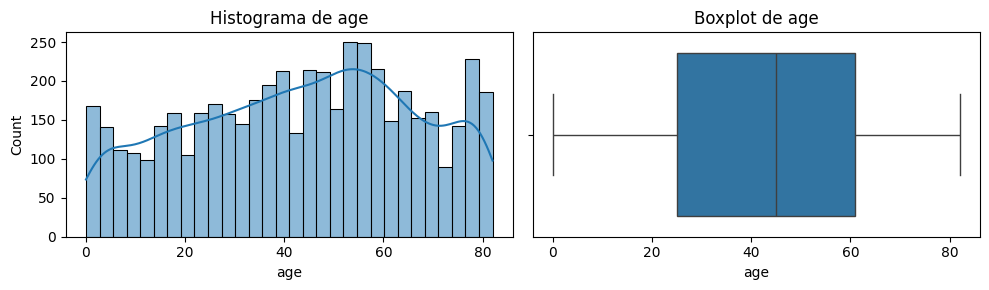

age: skewness = -0.14
  ✅ age es casi simétrica.


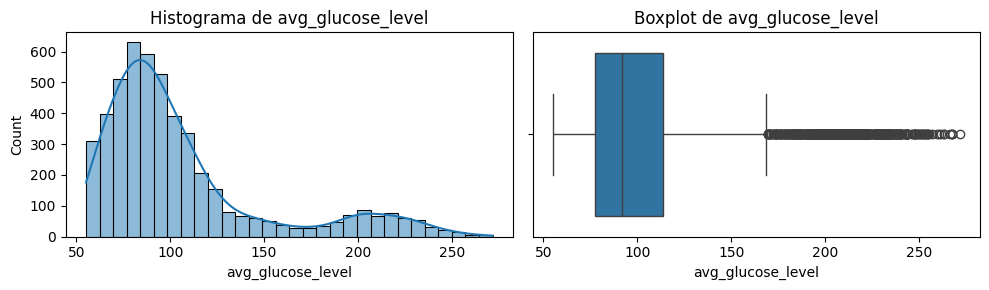

avg_glucose_level: skewness = 1.59
  ⚠️ avg_glucose_level está muy sesgada. Considera aplicar logaritmo si es positiva.


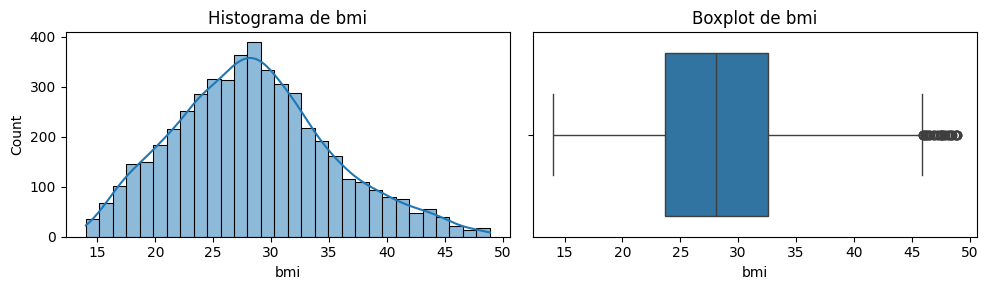

bmi: skewness = 0.37
  ✅ bmi es casi simétrica.


In [13]:
# Estadísticas descriptivas de las variables numéricas (solo las que NO son binarias)
# Definir columnas numéricas y filtrar solo las que tienen más de 2 valores únicos (no binarias)
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
# Excluir columnas binarias (solo 0 y 1)
num_cols_no_bin = [col for col in num_cols if df[col].nunique() > 2]

print("Variables numéricas NO binarias para análisis de skewness:", num_cols_no_bin)
display(df[num_cols_no_bin].describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualización y cálculo de skewness solo para variables numéricas no binarias
for col in num_cols_no_bin:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Histograma de {col}')
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()
    
    # Calcula y muestra el skewness (sesgo) de la variable
    skew = df[col].skew()
    print(f"{col}: skewness = {skew:.2f}")
    if abs(skew) > 1:
        print(f"  ⚠️ {col} está muy sesgada. Considera aplicar logaritmo si es positiva.")
    elif abs(skew) > 0.5:
        print(f"  ℹ️ {col} tiene sesgo moderado.")
    else:
        print(f"  ✅ {col} es casi simétrica.")

# Solo deberías considerar aplicar logaritmo a variables con skewness > 1 o < -1 (muy sesgadas), como en tu ejemplo avg_glucose_level: skewness = 1.59.

### 4.2 Estadísticas descriptivas de las variables categoricas


gender - Frecuencias:
gender
Female    2907
Male      2074
Name: count, dtype: int64

gender - Porcentajes:
gender
Female    58.36
Male      41.64
Name: proportion, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[0], palette="Blues_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette="Greens_d")


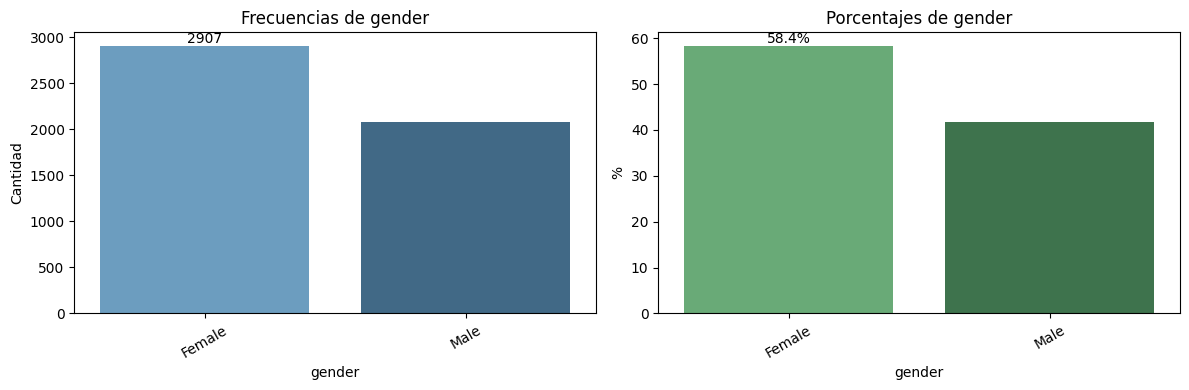


ever_married - Frecuencias:
ever_married
Yes    3280
No     1701
Name: count, dtype: int64

ever_married - Porcentajes:
ever_married
Yes    65.85
No     34.15
Name: proportion, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[0], palette="Blues_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette="Greens_d")


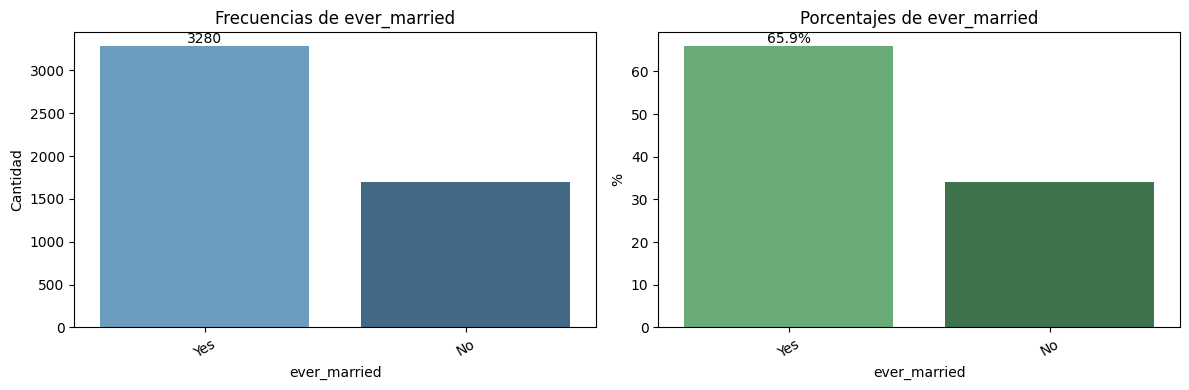


work_type - Frecuencias:
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64

work_type - Porcentajes:
work_type
Private          57.42
Self-employed    16.14
children         13.51
Govt_job         12.93
Name: proportion, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[0], palette="Blues_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette="Greens_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette

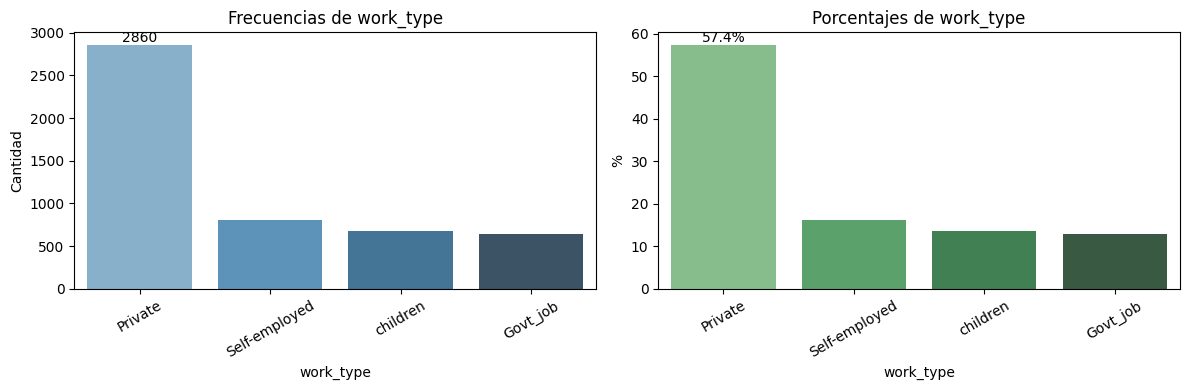

C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[0], palette="Blues_d")



Residence_type - Frecuencias:
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64

Residence_type - Porcentajes:
Residence_type
Urban    50.83
Rural    49.17
Name: proportion, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette="Greens_d")


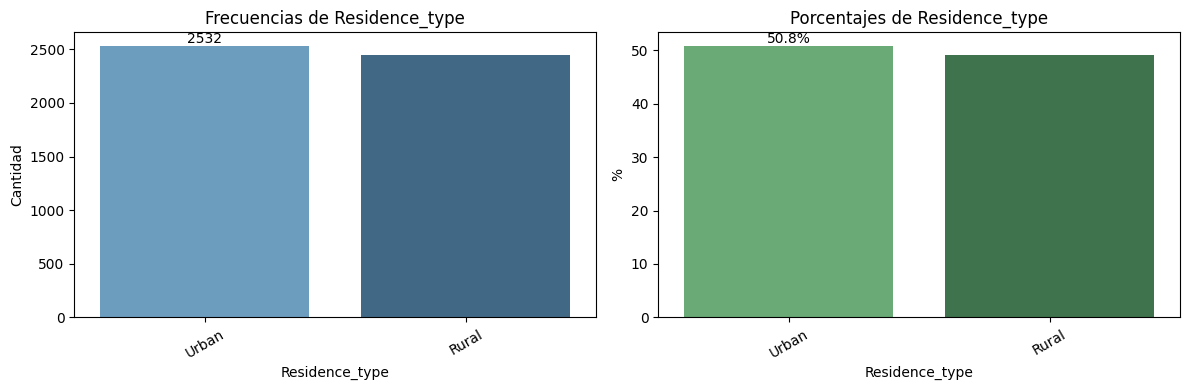


smoking_status - Frecuencias:
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64

smoking_status - Porcentajes:
smoking_status
never smoked       36.90
Unknown            30.11
formerly smoked    17.41
smokes             15.58
Name: proportion, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[0], palette="Blues_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette="Greens_d")
C:\Users\admin\AppData\Local\Temp\ipykernel_12788\3072412108.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette

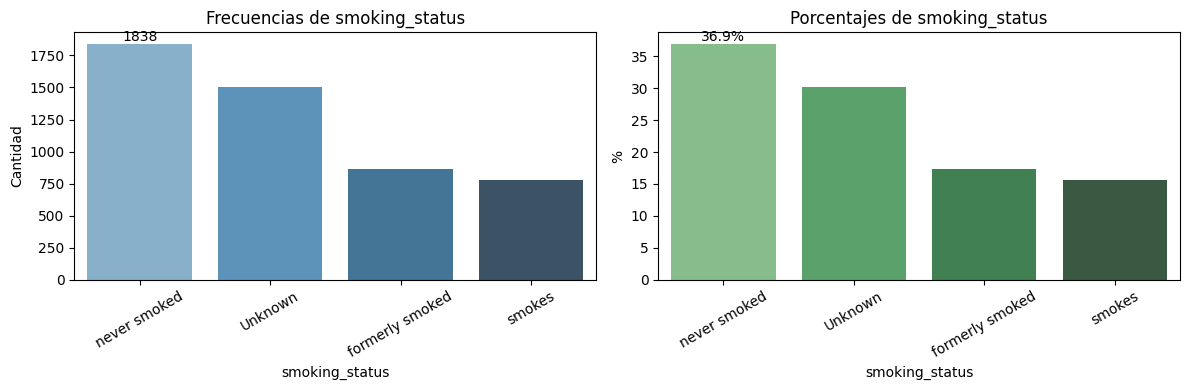

In [14]:
# ===========================
# Estadísticas descriptivas y gráficos de barras para variables categóricas
# ===========================

import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas a analizar
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in cat_cols:
    # Calcula frecuencias absolutas y porcentajes
    freq = df[col].value_counts(dropna=False)
    perc = df[col].value_counts(normalize=True, dropna=False) * 100

    # Imprime frecuencias y porcentajes en consola
    print(f"\n{col} - Frecuencias:")
    print(freq)
    print(f"\n{col} - Porcentajes:")
    print(perc.round(2))

    # Visualización: dos gráficos de barras por variable
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Gráfico de barras de frecuencias absolutas
    sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[0], palette="Blues_d")
    axes[0].set_title(f'Frecuencias de {col}')
    axes[0].set_ylabel('Cantidad')
    axes[0].set_xlabel(col)
    axes[0].bar_label(axes[0].containers[0], fmt='%d')
    axes[0].tick_params(axis='x', rotation=30)

    # Gráfico de barras de porcentajes
    sns.barplot(x=perc.index.astype(str), y=perc.values, ax=axes[1], palette="Greens_d")
    axes[1].set_title(f'Porcentajes de {col}')
    axes[1].set_ylabel('%')
    axes[1].set_xlabel(col)
    axes[1].bar_label(axes[1].containers[0], fmt='%.1f%%')
    axes[1].tick_params(axis='x', rotation=30)

    plt.tight_layout()
    plt.show()

# --------------------------
# ¿Qué hace este código?
# - Para cada variable categórica:
#   - Imprime en consola la frecuencia absoluta y el porcentaje de cada categoría.
#   - Muestra dos gráficos de barras: uno con las cantidades y otro con los porcentajes.
# - Así puedes comparar visualmente la distribución de cada variable categórica.
# --------------------------

# 5. Influencia de variables con la variable " TARGET" 

### 5.1 INFLUENCIA DE VARIABLES NUMÉRICAS SOBRE LA VARIABLE OBJETIVO (stroke)

Ranking de variables numéricas según ANOVA (mayor influencia sobre stroke):


c:\Users\admin\Desktop\Proyecto_9\data_scientist_g3\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Variable,F,p-value
1,stroke,inf,0.000000e+00
2,age,322.045639,7.897561e-70
3,heart_disease,91.884086,1.409808e-21
4,avg_glucose_level,89.971820,3.642051e-21
5,hypertension,88.245189,8.584821e-21
6,bmi,16.187059,5.823561e-05


Ranking de variables numéricas según correlación punto-biserial (mayor influencia sobre stroke):


,Variable,Corr_pb,p-value
1,stroke,1.000000,0.000000e+00
2,age,0.246478,7.897561e-70
3,heart_disease,0.134610,1.409808e-21
4,avg_glucose_level,0.133227,3.642051e-21
5,hypertension,0.131965,8.584821e-21
6,bmi,0.056926,5.823561e-05


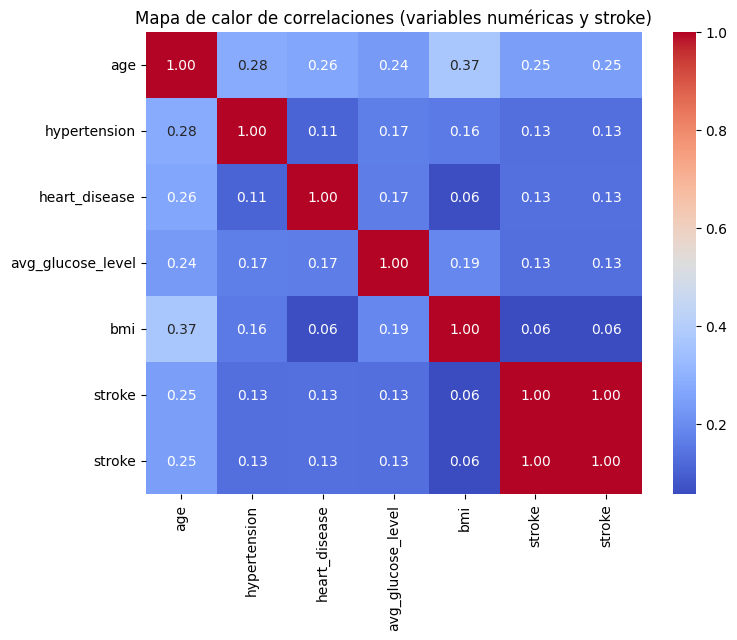

In [15]:
# ============================
# INFLUENCIA DE VARIABLES NUMÉRICAS SOBRE LA VARIABLE OBJETIVO (stroke)
# ============================

from scipy.stats import f_oneway, pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Paso 1: Definir listas para guardar resultados de ANOVA y correlación punto-biserial
anova_results = []
corr_results = []

# Paso 2: Para cada variable numérica, comparar su distribución entre grupos con y sin stroke
for col in num_cols:
    grupo0 = df[df['stroke']==0][col].dropna()
    grupo1 = df[df['stroke']==1][col].dropna()
    if len(grupo0)>1 and len(grupo1)>1:
        # ANOVA: compara medias entre los dos grupos
        fval, pval = f_oneway(grupo0, grupo1)
        anova_results.append({'Variable': col, 'F': fval, 'p-value': pval})
        # Correlación punto-biserial: mide fuerza y dirección de la relación (numérica vs binaria)
        try:
            corr, p_corr = pointbiserialr(df['stroke'].dropna(), df[col].dropna())
        except:
            corr, p_corr = np.nan, np.nan
        corr_results.append({'Variable': col, 'Corr_pb': corr, 'p-value': p_corr})

# Paso 3: Mostrar ranking ANOVA ordenado por p-valor (menor p-valor = mayor diferencia entre grupos)
if anova_results:
    anova_df = pd.DataFrame(anova_results).sort_values('p-value')
    anova_df = anova_df.reset_index(drop=True)
    anova_df.index += 1
    print("Ranking de variables numéricas según ANOVA (mayor influencia sobre stroke):")
    display(anova_df)
else:
    print('No hay resultados ANOVA para mostrar.')

# Paso 4: Mostrar ranking de correlación punto-biserial (mayor fuerza de asociación)
if corr_results:
    corr_df = pd.DataFrame(corr_results).sort_values('Corr_pb', key=lambda x: abs(x), ascending=False)
    corr_df = corr_df.reset_index(drop=True)
    corr_df.index += 1
    print("Ranking de variables numéricas según correlación punto-biserial (mayor influencia sobre stroke):")
    display(corr_df)
else:
    print('No hay resultados de correlación punto-biserial para mostrar.')

# Paso 5: Mapa de calor de correlaciones entre variables numéricas y stroke
num_corr_cols = [col for col in num_cols if col in df.columns]
corr_matrix = df[num_corr_cols + ['stroke']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones (variables numéricas y stroke)')
plt.show()

# --------------------------
# EXPLICACIÓN:
# - Para variables numéricas: se usa ANOVA para ver si la media difiere entre grupos (con/sin stroke) y correlación punto-biserial para medir fuerza de asociación.
# - Las tablas muestran qué variables están más asociadas a la variable objetivo (menor p-valor = mayor evidencia de asociación).
# - Los gráficos permiten visualizar cómo cambia la variable objetivo según cada variable explicativa.
# - El ranking ANOVA y punto-biserial está enumerado y ordenado de mayor a menor influencia/correlación con stroke.
# - El mapa de calor muestra visualmente la relación entre todas las variables numéricas y stroke.
# --------------------------

Claro, aquí tienes una explicación paso a paso de los resultados y cómo analizarlos:

---

## 1. ¿Qué resultados se obtuvieron?

### a) **Ranking ANOVA**
- Se calculó el test ANOVA para cada variable numérica, comparando la media entre los grupos con y sin stroke.
- El resultado es una tabla con columnas: **Variable**, **F** (estadístico F), y **p-value**.
- Se ordena de menor a mayor p-value (menor p-value = mayor diferencia entre grupos).

**Ejemplo de tabla:**

| # | Variable           | F           | p-value         |
|---|--------------------|-------------|-----------------|
| 1 | stroke             | inf         | 0.000000e+00    |
| 2 | age                | 322.05      | 7.90e-70        |
| 3 | heart_disease      | 91.88       | 1.41e-21        |
| 4 | avg_glucose_level  | 89.97       | 3.64e-21        |
| 5 | hypertension       | 88.25       | 8.58e-21        |
| 6 | bmi                | 16.19       | 5.82e-05        |

---

### b) **Ranking de correlación punto-biserial (Corr_pb)**
- Se calculó la correlación punto-biserial entre cada variable numérica y la variable objetivo (stroke).
- El resultado es una tabla con columnas: **Variable**, **Corr_pb** (valor de correlación), y **p-value**.
- Se ordena de mayor a menor **|Corr_pb|** (valor absoluto de la correlación).

**Ejemplo de tabla:**

| # | Variable           | Corr_pb     | p-value         |
|---|--------------------|-------------|-----------------|
| 1 | stroke             | 1.000       | 0.000000e+00    |
| 2 | age                | 0.246       | 7.90e-70        |
| 3 | heart_disease      | 0.135       | 1.41e-21        |
| 4 | avg_glucose_level  | 0.133       | 3.64e-21        |
| 5 | hypertension       | 0.132       | 8.58e-21        |
| 6 | bmi                | 0.057       | 5.82e-05        |

---

### c) **Mapa de calor de correlaciones**
- Se muestra un **heatmap** (mapa de calor) de la matriz de correlación entre todas las variables numéricas y stroke.
- Los valores cercanos a 1 o -1 indican fuerte relación, valores cercanos a 0 indican poca o ninguna relación.

---

## 2. ¿Qué es Corr_pb y p-value?

- **Corr_pb (correlación punto-biserial):**
  - Mide la fuerza y dirección de la relación entre una variable numérica y una variable binaria (stroke).
  - Va de -1 a 1.  
    - **Cerca de 0:** poca relación.
    - **Cerca de 1 o -1:** fuerte relación positiva o negativa.
- **p-value:**
  - Indica si la relación observada es estadísticamente significativa.
  - **p-value < 0.05:** la relación es significativa (no es por azar).
  - **p-value > 0.05:** la relación podría ser por azar (no significativa).

---

## 3. ¿Cómo se observan y qué conclusiones sacar?

- **Variables con mayor Corr_pb y menor p-value** son las más asociadas a stroke.
- En ambos rankings, las primeras variables (age, heart_disease, avg_glucose_level, hypertension) son las más relevantes.
- **bmi** tiene una correlación baja y un p-value más alto, por lo que es menos relevante.

---

## 4. ¿Se podría eliminar alguna variable?

- **Sí.** Si una variable tiene:
  - **Corr_pb** muy bajo (por ejemplo, |Corr_pb| < 0.05)
  - **p-value** alto (por ejemplo, p-value > 0.05)
- ...entonces **puede considerarse para eliminar**, ya que no aporta información relevante para predecir stroke.

En tu caso, **bmi** tiene la correlación más baja, pero su p-value sigue siendo significativo (<0.05), así que podrías mantenerla. Si alguna variable tuviera p-value > 0.05 y Corr_pb cercano a 0, sería candidata a eliminar.

---

## 5. ¿Cómo interpretar el mapa de calor?

- El **mapa de calor** muestra visualmente la fuerza de la relación entre variables.
- Los colores intensos (rojo o azul) indican correlaciones fuertes (positivas o negativas).
- Los colores claros o cercanos a blanco indican poca o ninguna correlación.
- Busca variables con colores intensos en la columna/filas de **stroke**: esas son las más asociadas.

---

## **Resumen y recomendaciones**

- **Mantén** las variables con mayor Corr_pb y menor p-value.
- **Considera eliminar** variables con Corr_pb cercano a 0 y p-value > 0.05.
- El mapa de calor ayuda a visualizar rápidamente qué variables están más relacionadas con stroke.
- Así puedes seleccionar las variables más útiles para tus modelos y descartar las irrelevantes.

¿Te gustaría que te ayude a automatizar la selección de variables según estos criterios?

### 5.2 INFLUENCIA DE VARIABLES Categoricas SOBRE LA VARIABLE OBJETIVO (stroke)

Ranking de variables categóricas según chi-cuadrado (mayor influencia sobre stroke):


,Variable,Chi2,p-value
1,ever_married,58.527501,2.004691e-14
2,work_type,47.831772,2.312446e-10
3,smoking_status,28.733513,2.547568e-06
4,Residence_type,1.355116,2.443858e-01
5,gender,0.391878,5.313137e-01


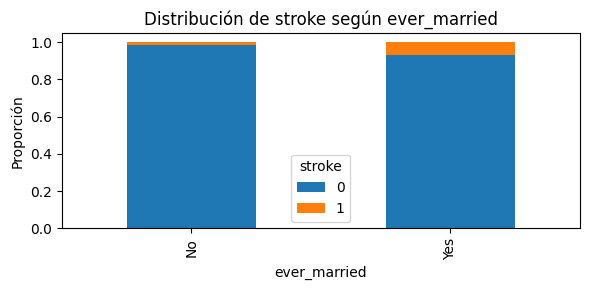

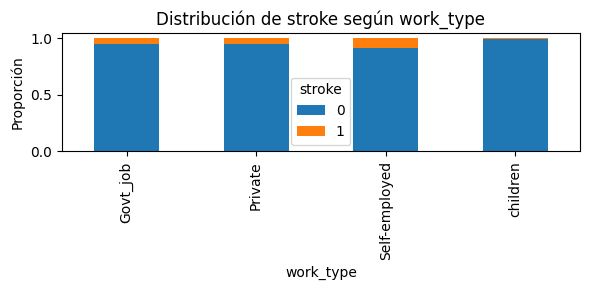

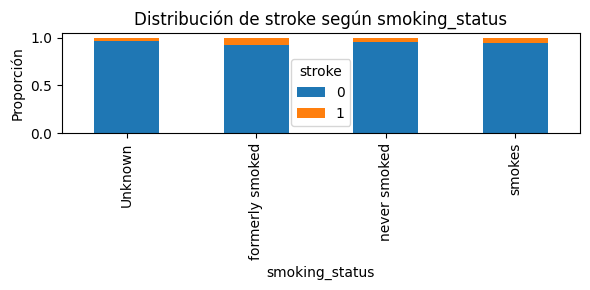

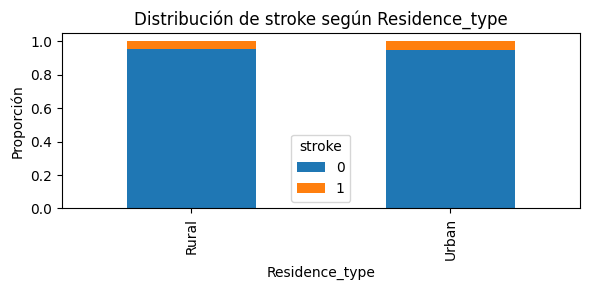

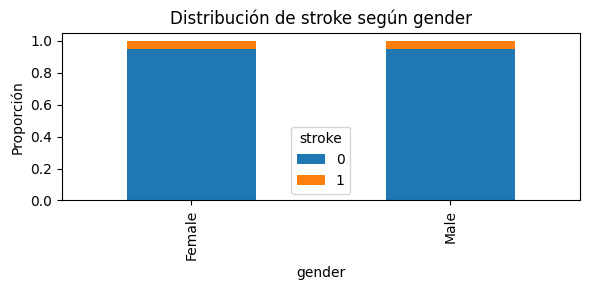

In [16]:
# ============================
# INFLUENCIA DE VARIABLES CATEGÓRICAS SOBRE LA VARIABLE OBJETIVO (stroke)
# ============================

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Inicializa una lista para guardar los resultados del test chi-cuadrado
chi2_results = []

# Paso 2: Para cada variable categórica (excepto 'stroke'), crea una tabla de contingencia con la variable objetivo
for col in cat_cols:
    if col == 'stroke':
        continue  # Evita comparar la variable objetivo consigo misma
    ct = pd.crosstab(df[col], df['stroke'])  # Tabla de frecuencias cruzadas
    # Paso 3: Aplica el test chi-cuadrado para medir la asociación entre la variable categórica y stroke
    chi2, p, dof, ex = chi2_contingency(ct, correction=False)
    chi2_results.append({'Variable': col, 'Chi2': chi2, 'p-value': p})

# Paso 4: Crea un DataFrame con los resultados y ordénalo por p-value (de menor a mayor, más asociadas primero)
chi2_df = pd.DataFrame(chi2_results).sort_values('p-value').reset_index(drop=True)
chi2_df.index += 1  # Enumera desde 1 para el ranking

# Paso 5: Muestra el ranking de variables categóricas según su asociación con stroke
print("Ranking de variables categóricas según chi-cuadrado (mayor influencia sobre stroke):")
display(chi2_df)

# Paso 6: (Opcional) Grafica las 5 variables categóricas más asociadas usando barras apiladas
top_cat = chi2_df.nsmallest(5, 'p-value')['Variable']
for col in top_cat:
    plt.figure(figsize=(6,3))
    prop = pd.crosstab(df[col], df['stroke'], normalize='index')
    prop.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribución de stroke según {col}')
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.legend(title='stroke')
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------
# RESUMEN Y ANÁLISIS:
# - El código evalúa la relación entre cada variable categórica y la variable objetivo (stroke) usando el test chi-cuadrado.
# - Se genera un ranking de las variables más asociadas a stroke (menor p-value = mayor asociación).
# - Un p-value bajo (<0.05) indica que la variable está significativamente asociada a stroke y es relevante para el modelo.
# - Un p-value alto (>0.05) indica que la variable NO está asociada y podría eliminarse del análisis/modelo.
# - Las gráficas apiladas permiten visualizar cómo se distribuye stroke según las categorías de cada variable.
# - Así puedes decidir qué variables categóricas conservar o descartar en tu análisis predictivo.
# ----------------------------------------------------------------------


## 1. **¿Qué muestra el cuadro (ranking chi-cuadrado)?**

- El cuadro muestra un **ranking de las variables categóricas** ordenadas por su p-value del test chi-cuadrado.
- **Columnas:**
  - **Variable:** nombre de la variable categórica.
  - **Chi2:** valor del estadístico chi-cuadrado (mayor valor = mayor diferencia entre categorías respecto a stroke).
  - **p-value:** probabilidad de que la asociación observada sea por azar (menor p-value = mayor evidencia de asociación real).

**Interpretación:**
- Las variables con **p-value más bajo** están más asociadas a la variable objetivo (`stroke`).
- Por ejemplo, si `ever_married` tiene p-value muy bajo, significa que el estado civil está fuertemente relacionado con la ocurrencia de stroke.
- Si una variable tiene **p-value alto** (mayor a 0.05), su asociación con stroke no es significativa y podría eliminarse del modelo.

---

## 2. **¿Qué muestran las gráficas apiladas?**

- Cada gráfica muestra la **distribución proporcional de stroke** (0 y 1) dentro de cada categoría de la variable.
- El eje X son las categorías (por ejemplo, tipos de trabajo, estado civil, etc).
- El eje Y es la proporción de personas con y sin stroke dentro de cada categoría.
- Los colores representan la proporción de casos con y sin stroke.

**Interpretación:**
- Si ves que una categoría tiene una barra mucho más alta para stroke=1 que otras, esa categoría está más asociada a tener un stroke.
- Si todas las categorías tienen proporciones similares, la variable no discrimina bien entre quienes tienen o no stroke.

---

## 3. **Conclusiones que puedes sacar**

- **Variables con p-value bajo y diferencias claras en las gráficas** son importantes para el modelo y deben conservarse.
- **Variables con p-value alto y barras similares** en las gráficas pueden eliminarse, ya que no aportan información relevante.
- El análisis te ayuda a **seleccionar solo las variables categóricas que realmente influyen** en la predicción de stroke.

---

## 4. **¿Vale la pena eliminar 1500 filas con `'Unknown'` en `smoking_status`?**

**Depende del contexto:**

- Si `'Unknown'` representa un porcentaje pequeño del total (<10-15%), **eliminar esas filas puede mejorar la calidad del análisis**, ya que esos datos no aportan información útil y pueden sesgar los resultados.
- Si `'Unknown'` es una proporción muy grande (por ejemplo, más del 20-30%), eliminar esas filas puede hacerte perder demasiada información y reducir el tamaño del dataset, afectando el entrenamiento del modelo.
- **Alternativa:** Puedes crear una categoría especial para `'Unknown'` y dejarla en el análisis, pero si ves que no está asociada a stroke (p-value alto), podrías eliminarla o imputarla.

**Recomendación práctica:**
- Si después de eliminar las filas con `'Unknown'` te quedan suficientes datos para entrenar y validar el modelo (por ejemplo, más de 3000-4000 filas), **sí vale la pena eliminarlas** para mejorar la calidad del dataset.
- Si el dataset es pequeño, considera imputar o mantener `'Unknown'` como categoría.

---

### **Resumen**

- El ranking y las gráficas te ayudan a identificar qué variables categóricas realmente influyen en stroke.
- Elimina variables con p-value alto y sin diferencias visuales en las gráficas.
- Eliminar filas con `'Unknown'` en `smoking_status` es recomendable si no pierdes demasiados datos y mejora la calidad del análisis.

¿Quieres que te ayude a ver cuántos datos quedarían si eliminas esas filas, o a imputar el valor de `'Unknown'`?

# 6. Eliminacion de 1500 filas de la variable Unknown de smoking_status

In [17]:
# Elimina las filas donde smoking_status es 'Unknown' (o variantes de 'unknown' en hidden_nulls)
# Esto asegura que se eliminan todas las filas con valores desconocidos en esa columna

# Lista de posibles variantes de 'unknown'
unknown_values = ['Unknown', 'unknown', 'UNKNOWN']

# Mostrar cantidad de filas antes de eliminar
filas_antes = df.shape[0]
print(f"Filas antes de eliminar Unknown en smoking_status: {filas_antes}")

# Eliminar filas
df = df[~df['smoking_status'].isin(unknown_values)].reset_index(drop=True)

# Mostrar cantidad de filas después de eliminar
filas_despues = df.shape[0]
print(f"Filas después de eliminar Unknown en smoking_status: {filas_despues}")

# Mostrar total de filas eliminadas
print(f"Total de filas eliminadas: {filas_antes - filas_despues}")

# Si quieres eliminar cualquier valor de hidden_nulls en smoking_status, usa:
# df = df[~df['smoking_status'].isin(hidden_nulls)].reset_index(drop=True)

Filas antes de eliminar Unknown en smoking_status: 4981
Filas después de eliminar Unknown en smoking_status: 3481
Total de filas eliminadas: 1500


# 7. Exportacion del archivo .CSV Limpio como stroke_dataset_clean

In [18]:
import os

# Crear la carpeta 'clean' si no existe
output_folder = '../data/clean'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
# Exportar el DataFrame limpio a la carpeta 'clean' con el nombre 'stroke_dataset_clean.csv'
output_path = os.path.join(output_folder, 'stroke_dataset_clean.csv')
df.to_csv(output_path, index=False)
print(f"Archivo exportado correctamente a: {output_path}")

Archivo exportado correctamente a: ../data/clean\stroke_dataset_clean.csv


# 8. # Visualización de la variable objetivo (stroke)

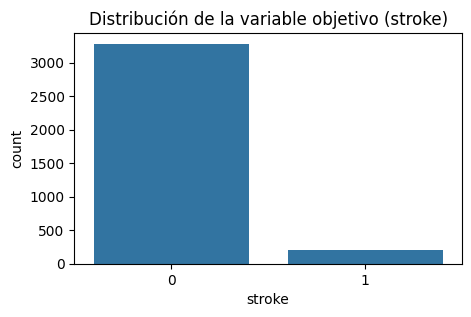

In [19]:
# Visualización de la variable objetivo (stroke)
plt.figure(figsize=(5,3))
sns.countplot(x='stroke', data=df)
plt.title('Distribución de la variable objetivo (stroke)')
plt.show()